In [2]:
import geopandas as gpd

china_path = "H:\\Region\\全国shp\\最新2021年全国行政区划\\省.shp"
china_shp = gpd.read_file(china_path)
china_shp

,省,省代码,省类型,geometry
0,安徽省,340000,省,"POLYGON ((116.42633 34.64000, 116.42607 34.638..."
1,澳门特别行政区,820000,特别行政区,"MULTIPOLYGON (((113.58117 22.19779, 113.57895 ..."
2,北京市,110000,直辖市,"POLYGON ((116.62585 41.05887, 116.62638 41.058..."
3,福建省,350000,省,"MULTIPOLYGON (((117.68877 23.53144, 117.68752 ..."
4,甘肃省,620000,省,"MULTIPOLYGON (((106.07129 35.44955, 106.07072 ..."
5,广东省,440000,省,"MULTIPOLYGON (((110.56038 20.32783, 110.55647 ..."
6,广西壮族自治区,450000,自治区,"MULTIPOLYGON (((109.21436 20.90184, 109.21081 ..."
7,贵州省,520000,省,"MULTIPOLYGON (((105.09467 24.92520, 105.09458 ..."
8,海南省,460000,省,"MULTIPOLYGON (((112.04826 3.83733, 112.01807 3..."
9,河北省,130000,省,"MULTIPOLYGON (((118.27154 38.98200, 118.27068 ..."


In [3]:
china_shp.cx[108:109, 34:35].shape[0]

1

In [4]:
import numpy as np
china_grid = np.zeros((180, 360))
china_grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
for lat in range(180):
    for lon in range(360):
        if china_shp.cx[lon-180:lon-179, lat-90:lat-89].shape[0] > 0:
            china_grid[lat, lon] = 1.0

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus']=False    # 负号

C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\3763752388.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("hsv").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


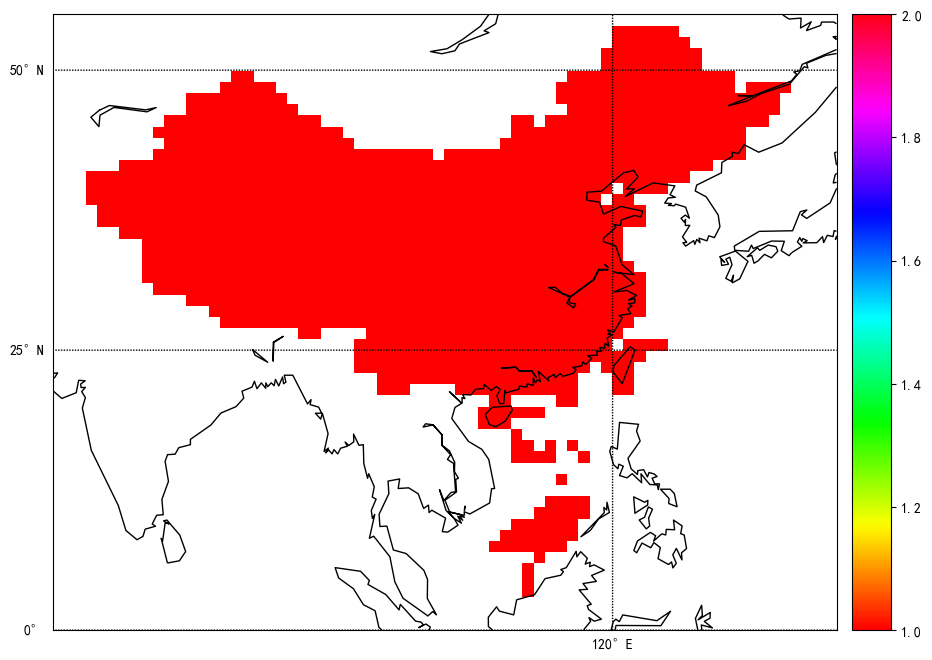

In [7]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=70., llcrnrlat=0., urcrnrlon=140., urcrnrlat=55.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, china_grid, cmap='hsv', vmin=1.0, vmax=2.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [8]:
from shapely.geometry import box

bbox_polygon = box(90., 38., 91., 39.)
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=china_shp.crs)

# 使用裁剪操作，获取落在感兴趣范围内的对象
clipped_gdf = gpd.clip(china_shp, bbox_gdf)

# 计算每个对象的面积
clipped_gdf['area'] = clipped_gdf.geometry.area

# 输出每个对象的面积
print(clipped_gdf['area'].sum())

0.9999999999999998


C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\2238090416.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area


<AxesSubplot:>

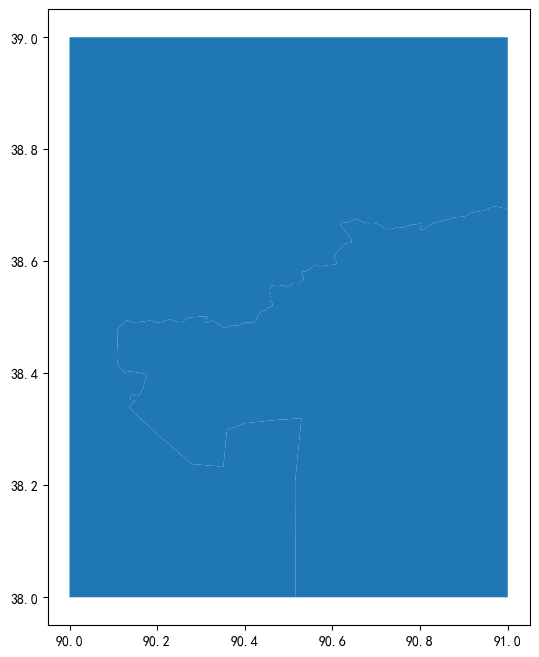

In [9]:
clipped_gdf.plot()

In [10]:
china_grid = np.zeros((180, 360))

for lat in range(90, 145):
    for lon in range(250, 320):
        bbox_polygon = box(lon - 180., lat - 90., lon - 179., lat - 89.)
        bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=china_shp.crs)
        clipped_gdf = gpd.clip(china_shp, bbox_gdf)
        clipped_gdf['area'] = clipped_gdf.geometry.area

        if clipped_gdf['area'].sum() > 0.4:
            china_grid[lat, lon] = 1.0

C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\1704623931.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area
C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\1704623931.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area
C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\1704623931.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area
C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\1704623931.py:8: UserWarning: Geometry is in a geographic CR

C:\Users\alzio\AppData\Local\Temp\ipykernel_4844\3012998813.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("hsv").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


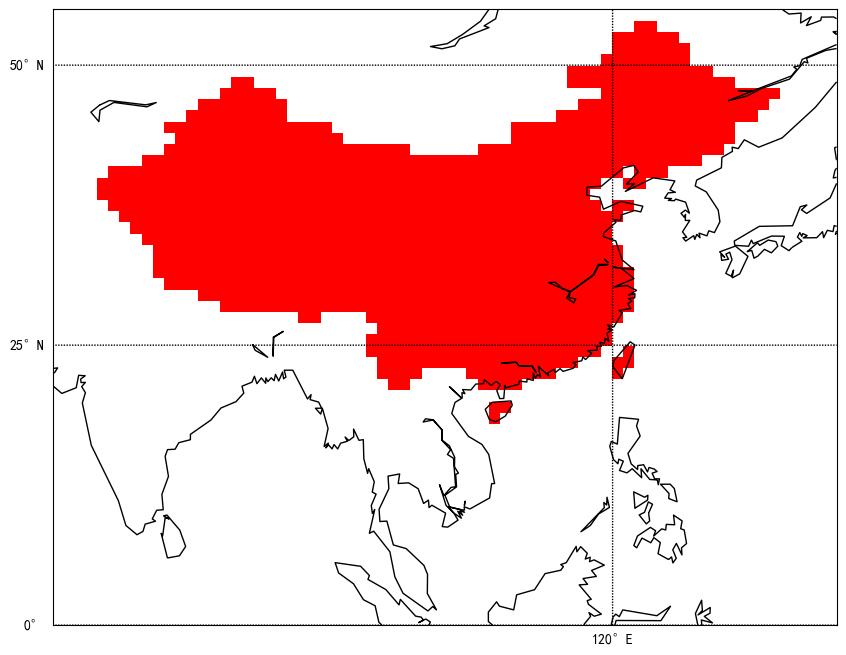

In [11]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=70., llcrnrlat=0., urcrnrlon=140., urcrnrlat=55.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, china_grid, cmap='hsv', vmin=1.0, vmax=2.0)
mapPlot.cmap.set_under('w')  # 设置底色
# cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [30]:
np.save("china.npy", china_grid)